## Predicting House Prices Using Machine Learning
## A Comparative Analysis of Algorithms and Features

# Data Dictionary
*  Area_Type:   The Type of Area of Property
* Availability: Earliest time to move in the property, availability for possession.
* Location: Locality or Area in the city
* Size: Property Type (Like 3BHK, 4BHK)
* Society: The property in the society or not
* Total Sqft area: Area of property
* Bathroom Nos: No of Bathroom in that particular Property
* Balcony: No of Balcony
* Price: Price of the property (target Column)


# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Importing data

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv",encoding='latin1')

In [3]:
data=df.copy()

In [4]:
df.shape

(13320, 9)

 ### The dataset  has 13320 rows and 9 columns

In [5]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,$38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,$204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,$600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,$63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,$370.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


### Check for duplicate rows

In [7]:
df.duplicated().sum() #There are 511 duplicated rows

511

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape  # Note   that the number of rows has decreased. That is, the duplicated rows are deleted!!

(12809, 9)

# Data Cleaning

In [10]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12809 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12809 non-null  object 
 1   availability  12809 non-null  object 
 2   location      12808 non-null  object 
 3   size          12793 non-null  object 
 4   society       7474 non-null   object 
 5   total_sqft    12809 non-null  object 
 6   bath          12736 non-null  float64
 7   balcony       12204 non-null  float64
 8   price         12809 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1000.7+ KB


In [12]:
import pprint
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
for column in df.columns:
    print(f'Unique values of column {column}')
    pprint.pprint(list(df[column].unique()))
    print("*"*100)
    

Unique values of column area_type
['Super built-up  Area', 'Plot  Area', 'Built-up  Area', 'Carpet  Area']
****************************************************************************************************
Unique values of column availability
['19-Dec',
 'Ready To Move',
 '18-May',
 '18-Feb',
 '18-Nov',
 '20-Dec',
 '17-Oct',
 '21-Dec',
 '19-Sep',
 '20-Sep',
 '18-Mar',
 '20-Feb',
 '18-Apr',
 '20-Aug',
 '18-Oct',
 '19-Mar',
 '17-Sep',
 '18-Dec',
 '17-Aug',
 '19-Apr',
 '18-Jun',
 '22-Dec',
 '22-Jan',
 '18-Aug',
 '19-Jan',
 '17-Jul',
 '18-Jul',
 '21-Jun',
 '20-May',
 '19-Aug',
 '18-Sep',
 '17-May',
 '17-Jun',
 '21-May',
 '18-Jan',
 '20-Mar',
 '17-Dec',
 '16-Mar',
 '19-Jun',
 '22-Jun',
 '19-Jul',
 '21-Feb',
 'Immediate Possession',
 '19-May',
 '17-Nov',
 '20-Oct',
 '20-Jun',
 '19-Feb',
 '21-Oct',
 '21-Jan',
 '17-Mar',
 '17-Apr',
 '22-May',
 '19-Oct',
 '21-Jul',
 '21-Nov',
 '21-Mar',
 '16-Dec',
 '22-Mar',
 '20-Jan',
 '21-Sep',
 '21-Aug',
 '14-Nov',
 '19-Nov',
 '15-Nov',
 '16-Jul',
 '15-Jun

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12809 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12809 non-null  object 
 1   availability  12809 non-null  object 
 2   location      12808 non-null  object 
 3   size          12793 non-null  object 
 4   society       7474 non-null   object 
 5   total_sqft    12809 non-null  object 
 6   bath          12736 non-null  float64
 7   balcony       12204 non-null  float64
 8   price         12809 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1000.7+ KB


### The columns size, total_sqft, and  price are given as object datatype. These columns can be considered as numerical columns.

In [14]:
df['size'].value_counts()

2 BHK         4942
3 BHK         4125
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          523
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [15]:
df['size'].isnull().sum() # Number of null values in the column 'size'

16

In [16]:
df.dropna(subset=['size'],inplace=True) #Dropping rows in which 'size' is null.

### To make the 'size' column numeric, we will remove terms BHK, Bedroom, RK... and just consider the number of rooms.

In [17]:
df['size']=df['size'].apply(lambda x:str(x).split(" ")[0]) # Replacing values with number of rooms
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,$51.00


In [18]:
df['size'].value_counts()

2     5256
3     4660
4     1398
1      640
5      350
6      221
7       99
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: size, dtype: int64

In [19]:
df['size']=df['size'].astype(int) #Change datatype of size to 'int'

### Consider the column 'total_sqft'.

In [20]:
pd.set_option('display.max_rows',None)
df['total_sqft'].value_counts()

1200                 809
1100                 210
1500                 202
2400                 195
600                  178
1000                 168
1350                 127
1050                 112
1300                 111
1250                 111
1400                 105
1800                 104
900                  104
1600                 100
1150                 100
2000                  79
1140                  77
1450                  68
1650                  67
800                   67
3000                  66
2500                  62
1020                  60
1550                  60
950                   59
1700                  58
1180                  56
1260                  56
1075                  55
1125                  55
1080                  54
1160                  53
750                   52
1070                  50
1220                  50
700                   49
1225                  48
1255                  47
4000                  47
1240                  46


## Some of the values are given with units Sq. Meter, Sq. Yards, Acres, Grounds, Guntha, Perch and Cents.These values should be converted to the unit of the column 'sqft'. Also note that some of the values are given as a range. We will find the average value for those given as a range.

Convertion of units using the following 
* 1 Sq. Meter=10.764 sqft
* 1Sq. Yards=9 sqft
* 1Acre=43560 sqft
* 1Ground=2400 sqft
* 1Perch=272.25 sqft
* 1Cent=435.56 sqft
* 1 Guntha=1089 sqft

In [21]:
import re

In [22]:
def convert_to_sqft(x):
    y=str(x).split("-")
    unitname='sqft' # Default unit of values
    if len(y)==1:# those values that are not given as range
        match=re.match(r'(\d+\.\d+)(\D+)',y[0]) # values given as float
        if match:
            area=match.group(1)
            unitname=match.group(2) # the unit given is extracted for those given specifically in the column with values
        else:
            match=re.match(r'(\d+)(\D+)',y[0]) # values given as integers
            if match:
                area=match.group(1)
                unitname=match.group(2)
            else:
                area=y[0]
  # Unit convertions          
        if unitname=='Sq. Meter':
           area=float(area)* 10.764
        elif unitname=='Sq. Yards':
           area=float(area)* 9
        elif unitname=='Acres':
           area=float(area)* 43560
        elif unitname=='Grounds':
           area=float(area)* 2400
        elif unitname=='Guntha':
           area=float(area)* 1089
        elif unitname=='Perch':
           area=float(area)* 272.25
        elif unitname=='Cents':
           area=float(area)* 435.56
        return area
    
    else:
        return (float(y[0])+float(y[1]))/2 # Find average for values given as range
df['total_sqft']=df['total_sqft'].apply(convert_to_sqft) # Apply the map

In [23]:
df['total_sqft'].value_counts()

1200                  809
1100                  210
1500                  202
2400                  195
600                   178
1000                  168
1350                  127
1050                  112
1300                  111
1250                  111
1400                  105
900                   104
1800                  104
1150                  100
1600                  100
2000                   79
1140                   77
1450                   68
800                    67
1650                   67
3000                   66
2500                   62
1020                   61
1550                   60
950                    59
1700                   58
1180                   56
1260                   56
1075                   55
1125                   55
1080                   54
1160                   53
750                    52
1220                   50
1070                   50
700                    49
1225                   48
1255                   47
4000        

### All the values in the column 'total_sqft' are converted to values in unit 'sqft'.

In [24]:
df['total_sqft']=df['total_sqft'].astype(float) #Change datatype of total_sqft to 'float'

### Consider column 'price'

In [25]:
df['price'].value_counts()

75            293
65            284
55            260
60            255
45            228
50            221
70            202
90            193
85            190
80            180
110           173
95            171
150           170
100           166
40            162
120           160
125           153
130           131
58            127
35            120
48            119
42            113
52            110
115           107
68            107
140           107
160           102
62            100
200           100
56             95
78             85
72             82
46             82
180            80
105            78
135            78
57             76
250            69
38             68
300            68
44             67
67             64
170            64
53             64
47             64
88             64
59             63
69             63
39             60
145            60
49             59
175            58
63             55
54             54
240            54
32        

### There are some special characters in some values which should be removed. For values given as range find the average. Also some values are in dollars and units of others are not given. The values must be in thousands of dollars as they are prices of houses.

In [26]:
def price_map_condition(x):
    y=str(x).split("-")
    if len(y)==1: # Values that are not given as ranges
        match=re.search(r'\b\d+\.\d+\b',y[0])
        if match:
            price=match.group()
            return price
        else:
            match=re.search(r'\b\d+\b',y[0])
            if match:
               price=match.group()
               return price
    else:
        return (float(y[0])+float(y[1]))/2  # return the average price for those given as range      

df['price']=df['price'].apply(price_map_condition) # Apply the function for the price column

In [27]:
print(price_map_condition(' $  123'))

123


In [28]:
df['price'].value_counts()

75        293
65        284
55        260
60        255
45        228
50        221
70        202
90        193
85        190
80        180
110       173
95        171
150       170
100       166
40        162
120       160
125       153
130       131
58        127
35        120
48        119
42        113
52        110
140       107
115       107
68        107
160       102
62        100
200       100
56         95
78         85
46         82
72         82
180        80
135        78
105        78
57         76
250        69
300        68
38         68
44         67
53         64
170        64
67         64
88         64
47         64
69         63
59         63
39         60
145        60
49         59
175        58
63         55
54         54
240        54
32         53
41         52
36         52
30         51
66         50
82         49
98         49
73         49
43         48
220        45
25         45
165        43
37         41
51         40
79         40
260        40
225   

In [29]:
df['price']=df['price'].astype(float) # Change datatype of price to 'float'

## EDA

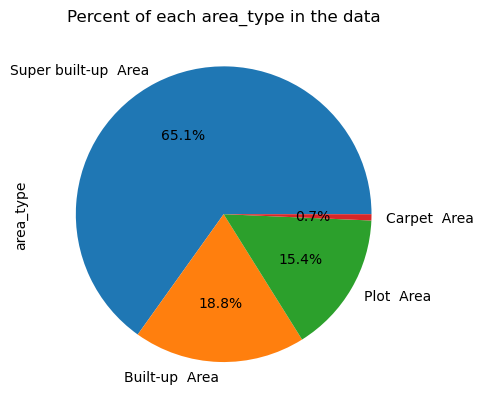

In [30]:
df['area_type'].value_counts().plot(autopct='%1.1f%%',kind='pie')
plt.title('Percent of each area_type in the data')
plt.show()

### Note that majority of the records are of area_type 'Super build_up area'. Only 0.7% of the records are of area_type 'Carpet area'.

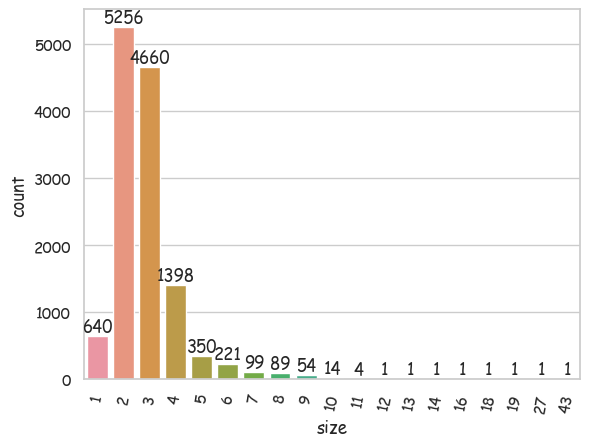

In [31]:
# count plot of column "size"
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["size"])
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])

plt.show()

### Most of the houses included in the data are either 2BHK or 3BHK

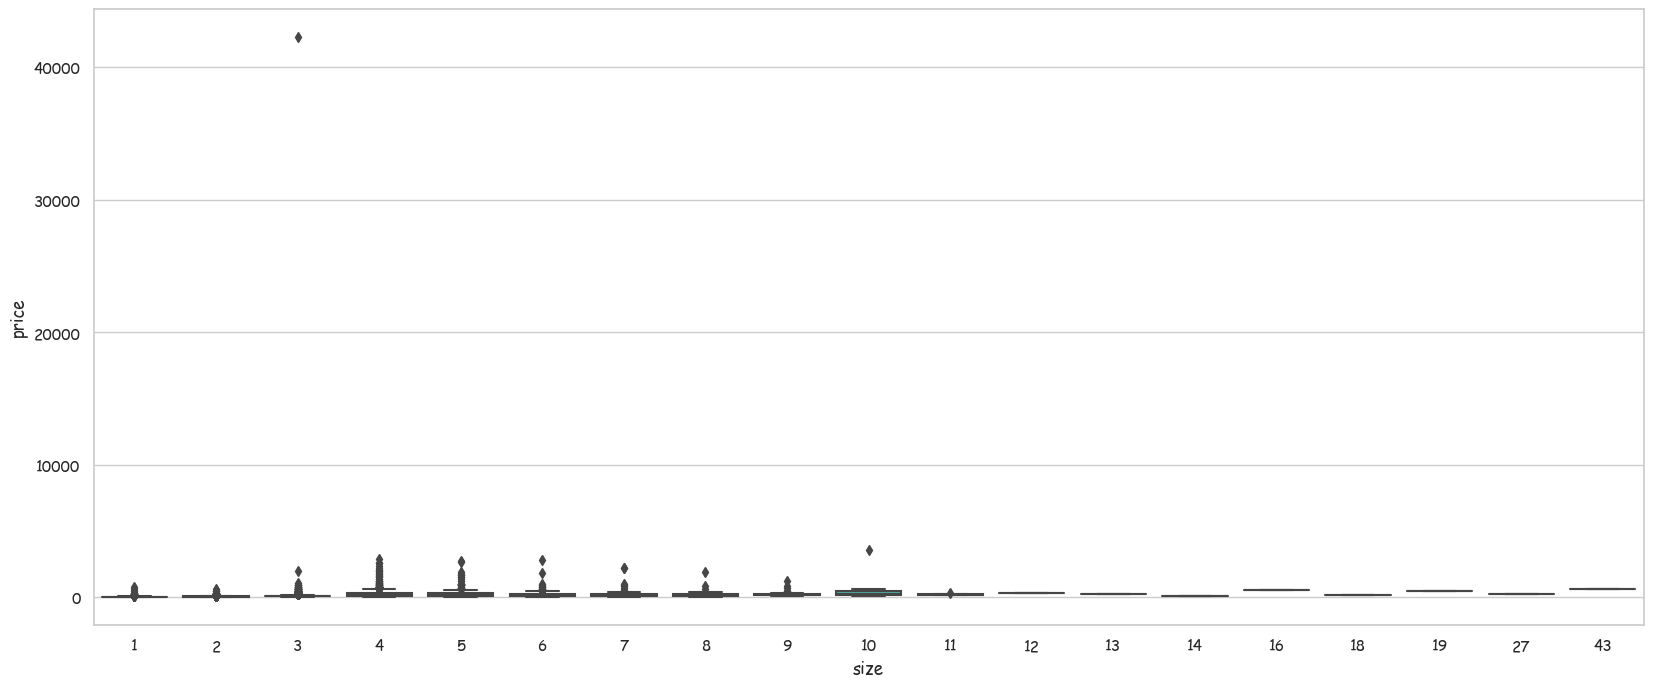

In [32]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df['size'],y=df['price'])
plt.show()

### Price of one of 3 BHK house is extremely higher than all the other prices, the value is clearly an error as even the 43 BHK house does not has such price. Delete the record for which the price is greater than 40000.

In [33]:
df=df[df['price']<40000] # Extracting only records where price is less than 40000

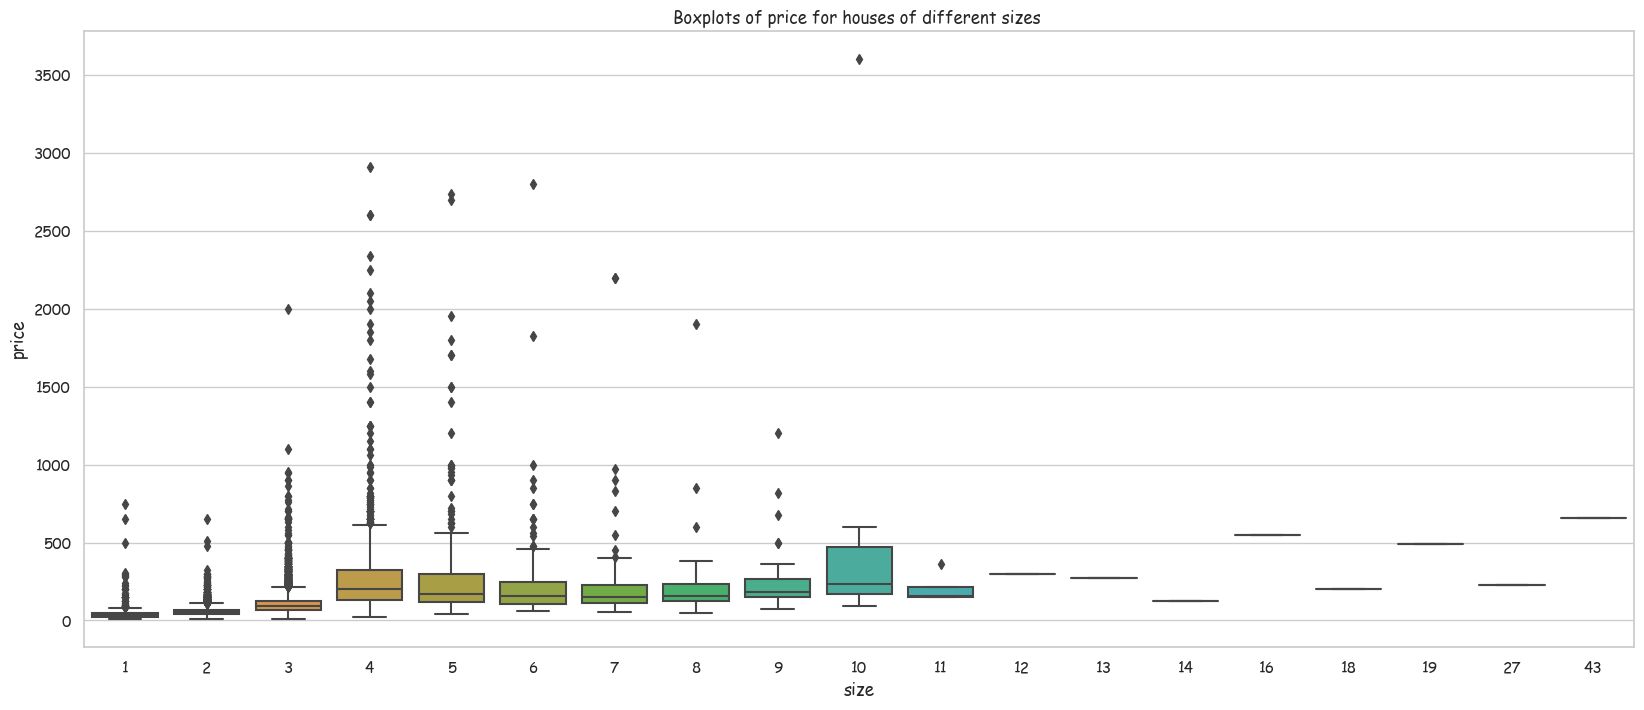

In [34]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df['size'],y=df['price'])
plt.title('Boxplots of price for houses of different sizes ')
plt.show()

###  There are many outliers in the price values. The prices for same sized houses can vary based on the locations. So the outliers in prices can occur.

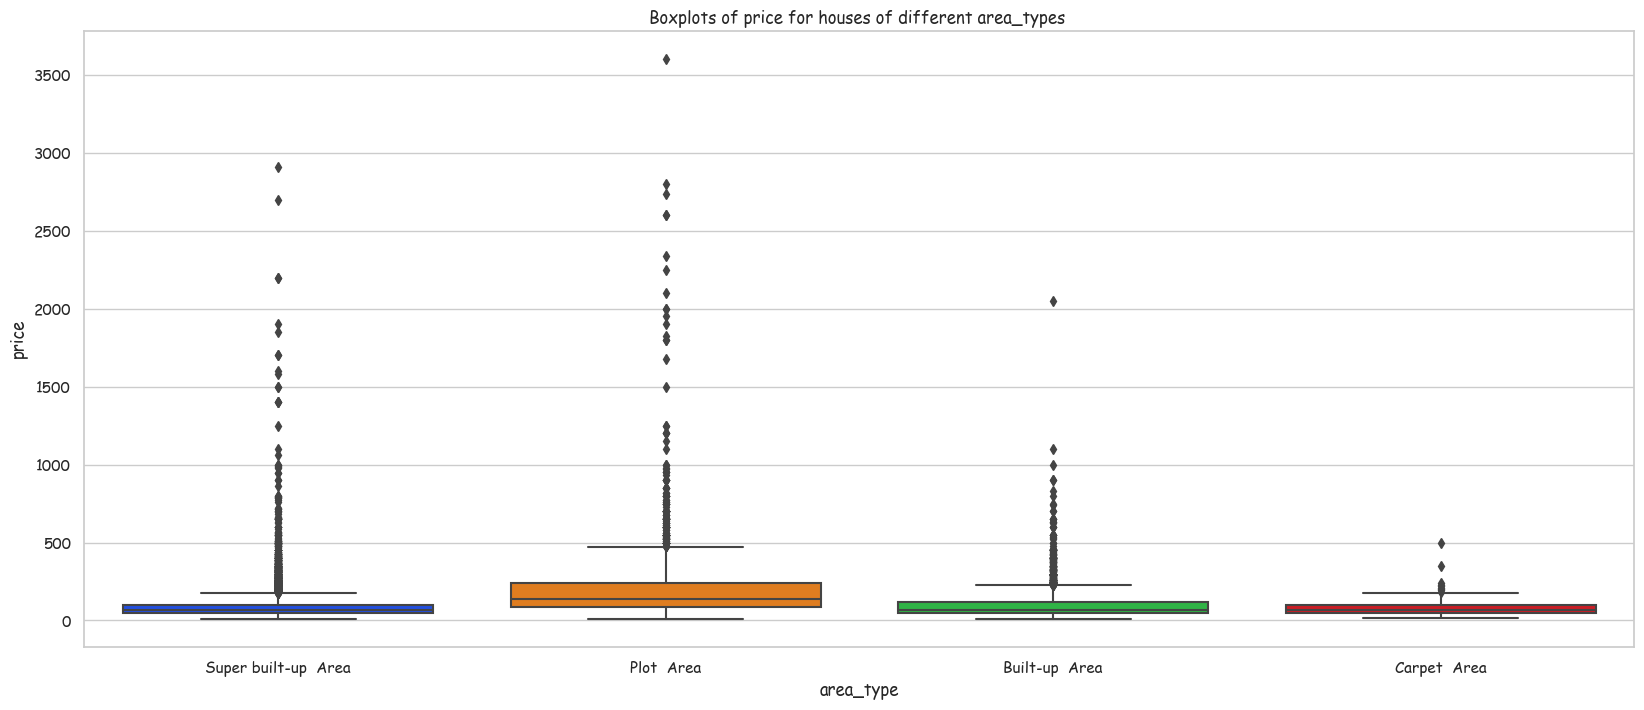

In [35]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df['area_type'],y=df['price'])
plt.title('Boxplots of price for houses of different area_types ')
plt.show()

Text(0, 0.5, 'Number of bathrooms')

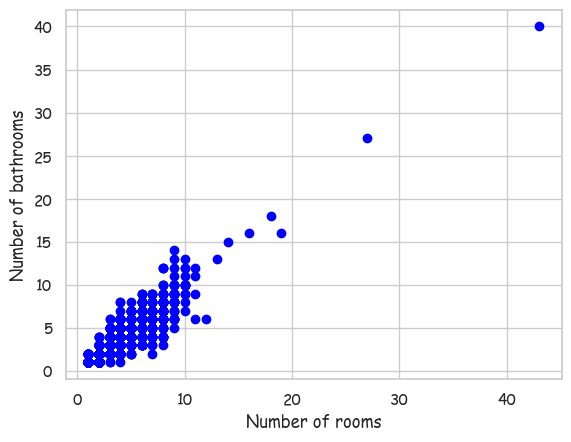

In [36]:
plt.scatter(x=df['size'],y=df['bath'], color='blue',label='Scatter Plot' )
plt.xlabel('Number of rooms')
plt.ylabel('Number of bathrooms')

### There is a strong positive correlation between the 'size' and 'bath' features. But strangely for some records, the number of bath rooms is more than number of rooms. These values might be due to some error and has to be treated.

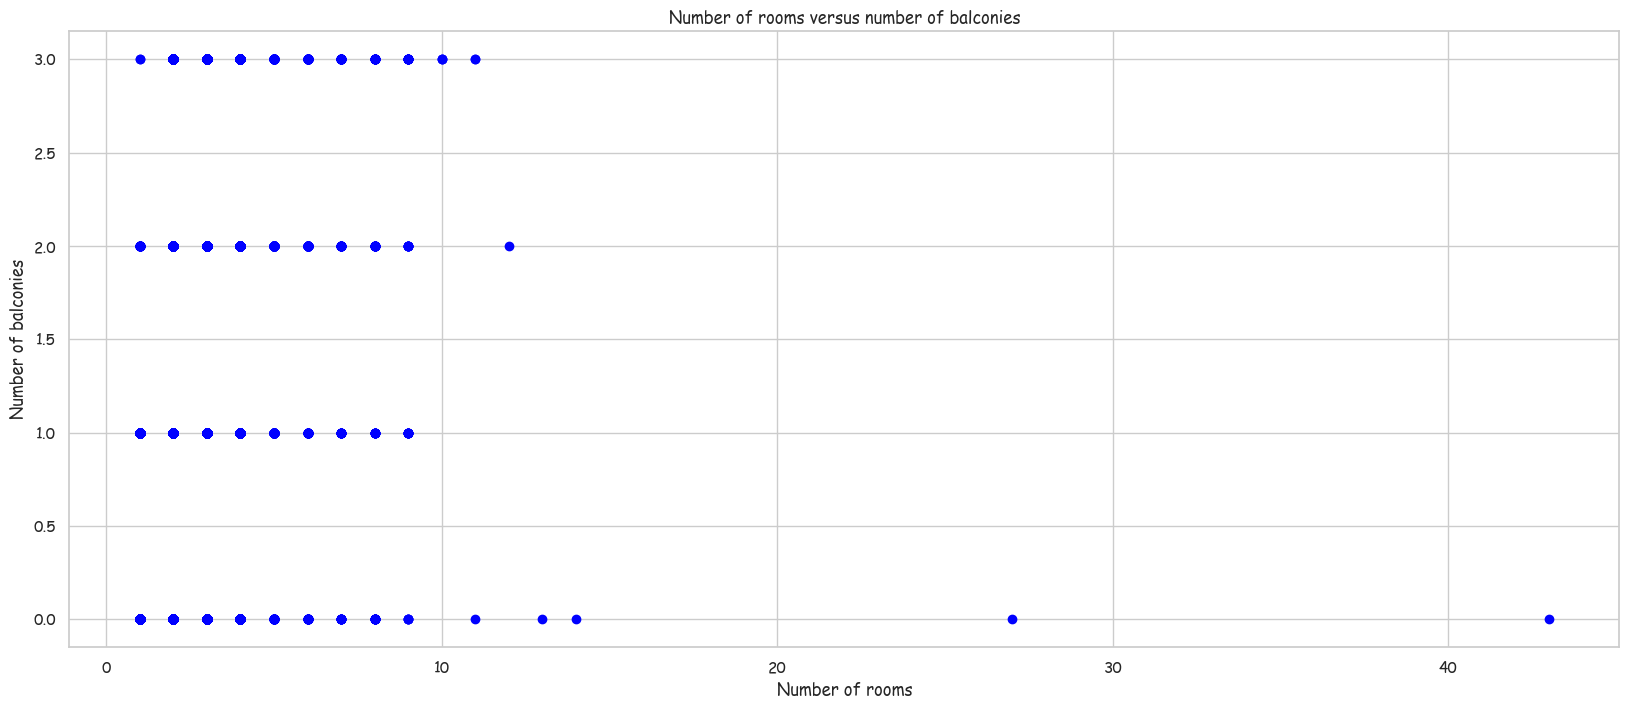

In [37]:
plt.figure(figsize=(20,8))
plt.scatter(x=df['size'],y=df['balcony'], color='blue',label='Scatter Plot' )
plt.xlabel('Number of rooms')
plt.ylabel('Number of balconies')
plt.title('Number of rooms versus number of balconies')
plt.show()

### There is no correlation between number of rooms and number of balconies. Also some houses with very large 'size' has no balconies.

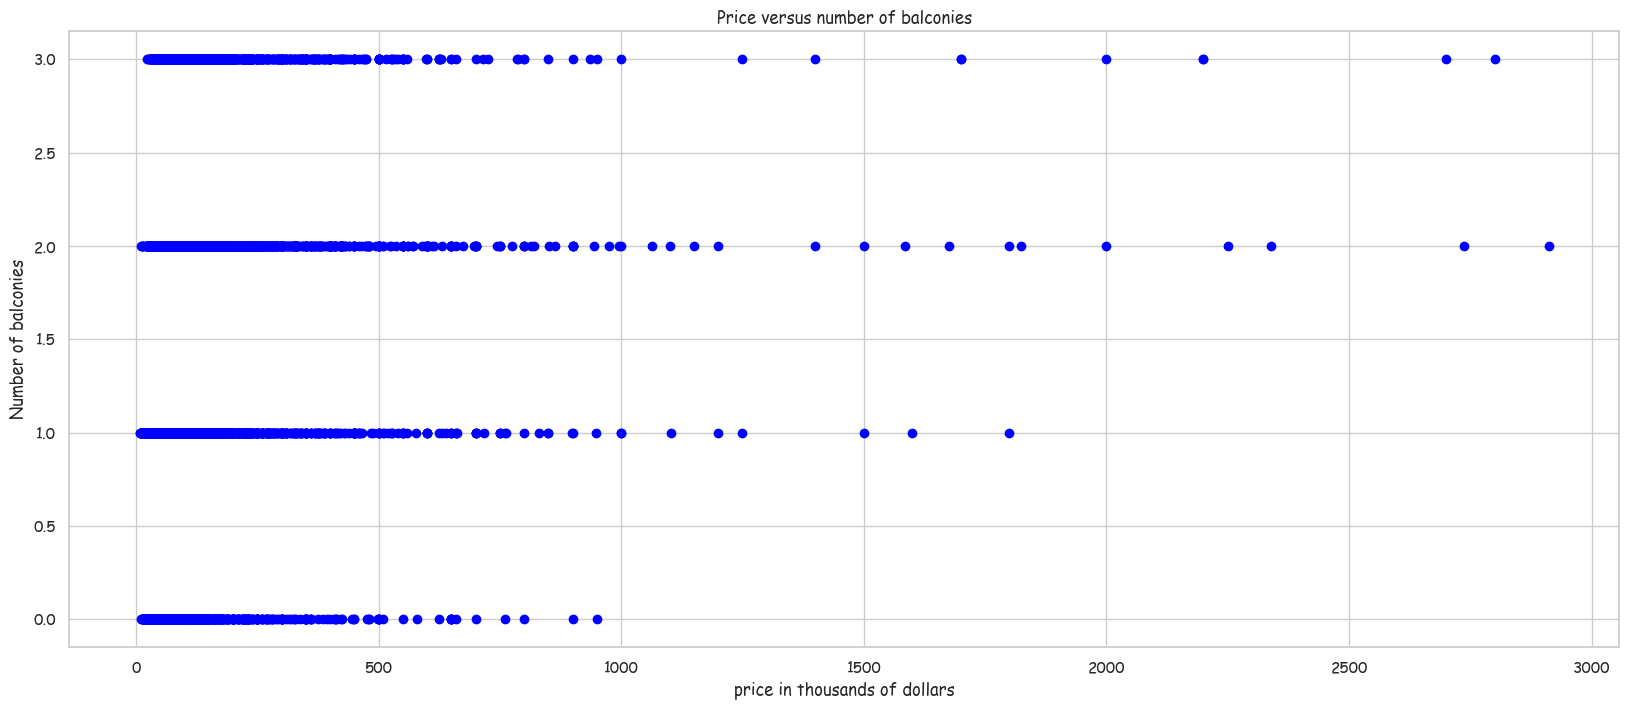

In [38]:
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
plt.figure(figsize=(20,8))
plt.scatter(x=df['price'],y=df['balcony'], color='blue',label='Scatter Plot' )
plt.xlabel('price in thousands of dollars')
plt.ylabel('Number of balconies')
plt.title('Price versus number of balconies')
plt.show()

### There are some houses with 2 or 3 balconies that have extremely high prices.

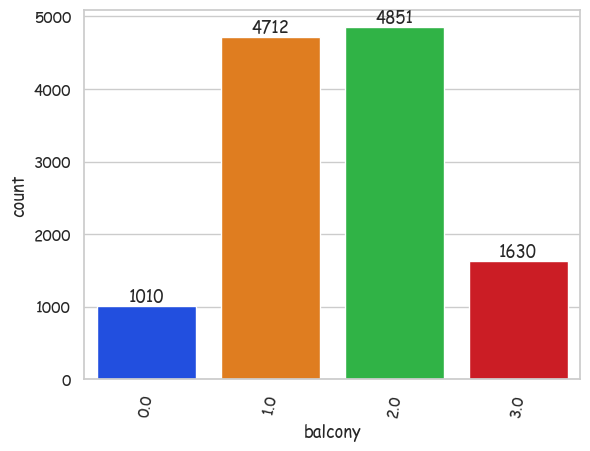

In [39]:
# count plot of column "balcony"
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["balcony"])
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.show()

### Most of the houses included in the data has 2 or 3 balconies.

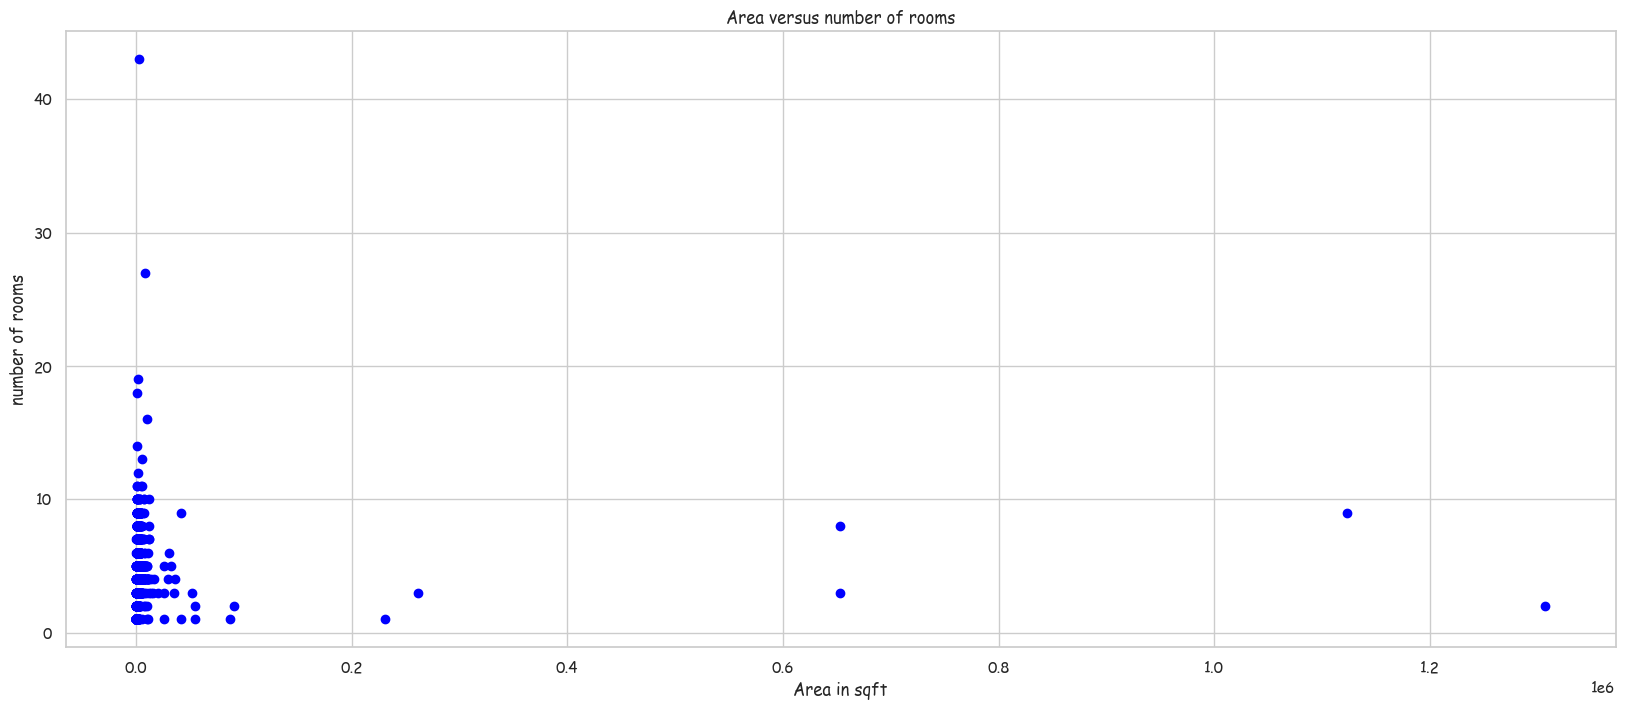

In [40]:
plt.figure(figsize=(20,8))
plt.scatter(x=df['total_sqft'],y=df['size'], color='blue',label='Scatter Plot' )
plt.xlabel('Area in sqft')
plt.ylabel('number of rooms')
plt.title('Area versus number of rooms')
plt.show()

### There are some records with very low sqft area but very high number of rooms and also records with Large area and very less number of rooms. These records might be due to errors.

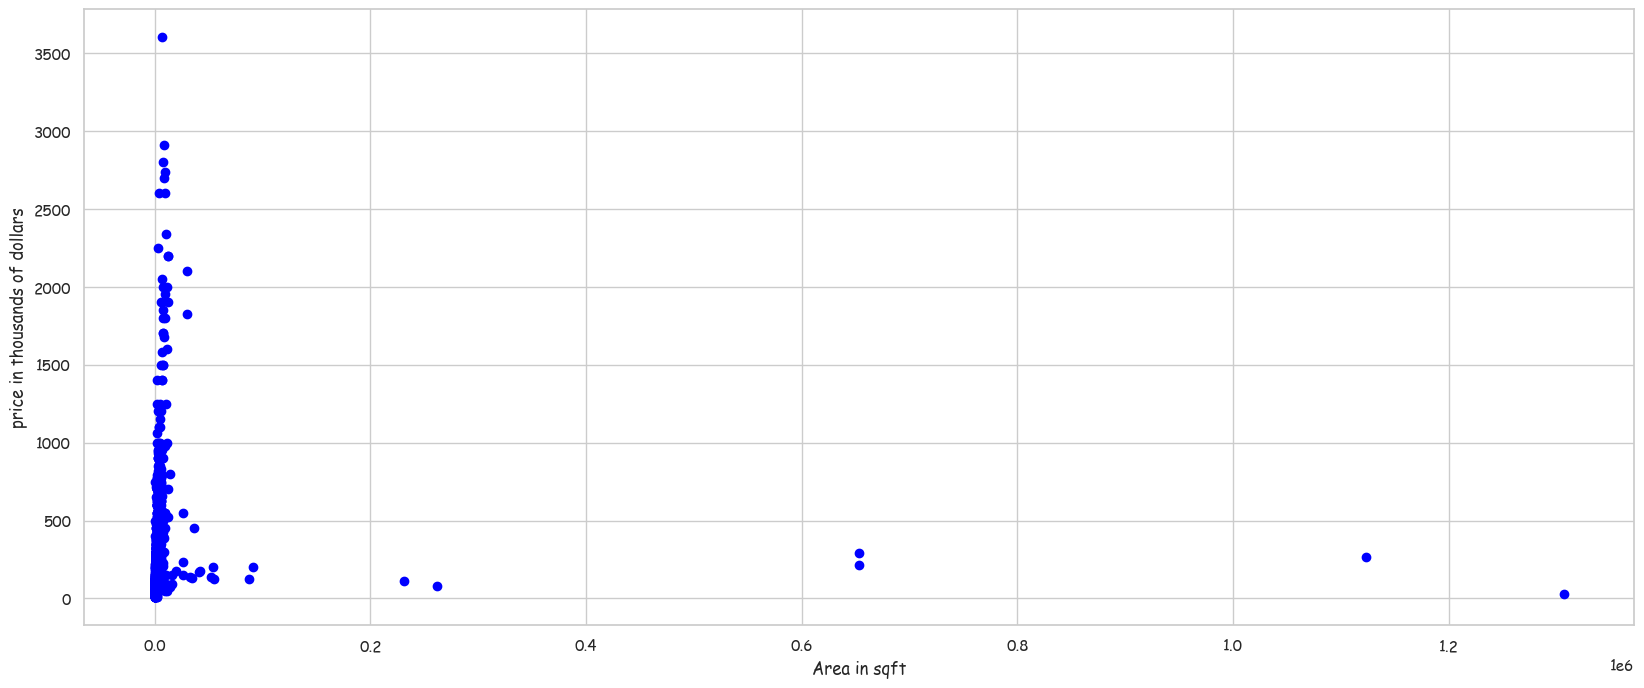

In [41]:
plt.figure(figsize=(20,8))
plt.scatter(x=df['total_sqft'],y=df['price'], color='blue',label='Scatter Plot' )
plt.xlabel('Area in sqft')
plt.ylabel('price in thousands of dollars')
plt.show()

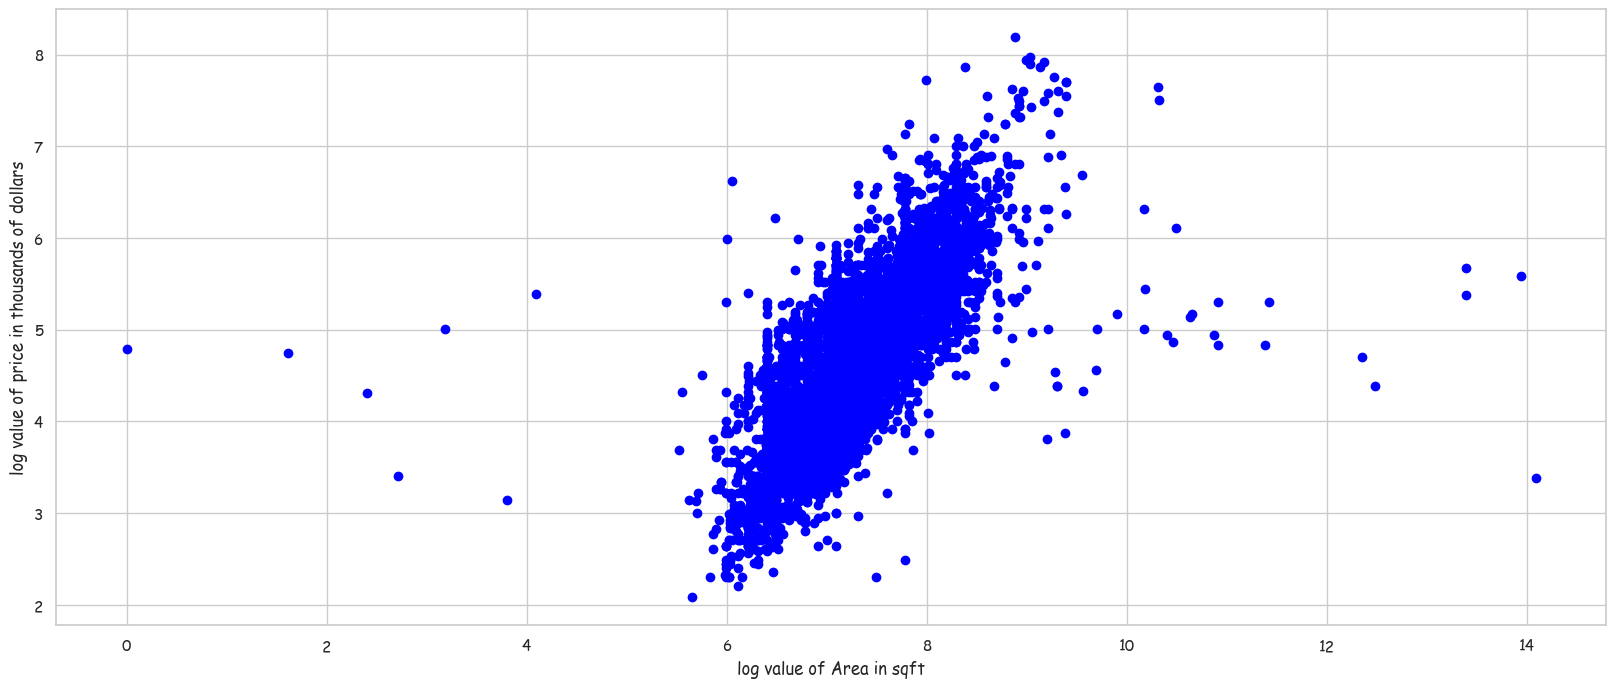

In [42]:
plt.figure(figsize=(20,8))
plt.scatter(x=np.log(df['total_sqft']),y=np.log(df['price']), color='blue',label='Scatter Plot' )
plt.xlabel('log value of Area in sqft')
plt.ylabel('log value of price in thousands of dollars')
plt.show()

### There is positive correlation between 'total_sqft' and 'price'. There are some outliers which should be treated.

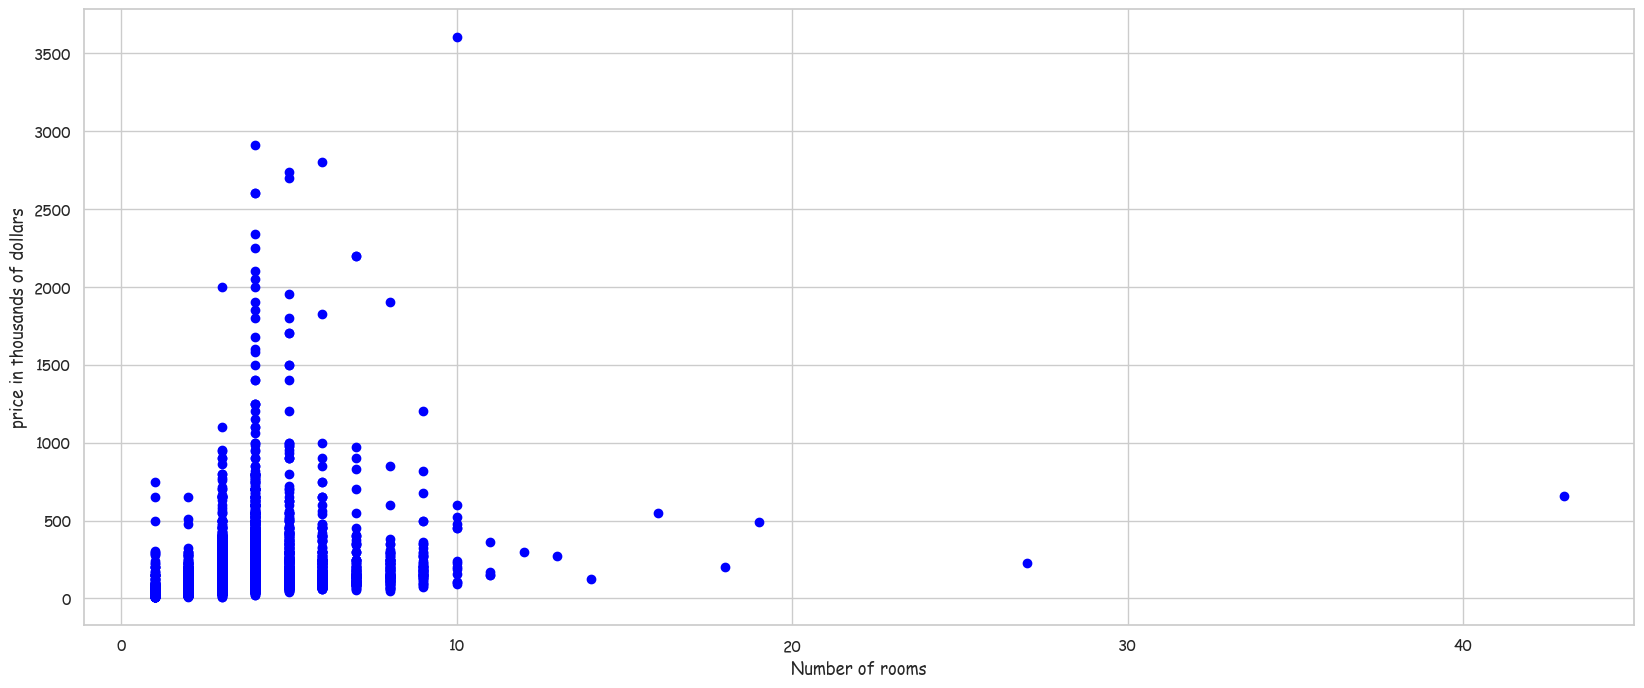

In [43]:
plt.figure(figsize=(20,8))
plt.scatter(x=df['size'],y=df['price'], color='blue',label='Scatter Plot' )
plt.xlabel('Number of rooms')
plt.ylabel('price in thousands of dollars')
plt.show()

### Note that there are some houses with very large number of rooms, but the price is very low compared to houses with lower number of rooms. Let us remove the rows with price<1000 and size>15

In [46]:
df=df[~((df['price']<1000)&(df['size']>15))]
df.shape

(12787, 9)

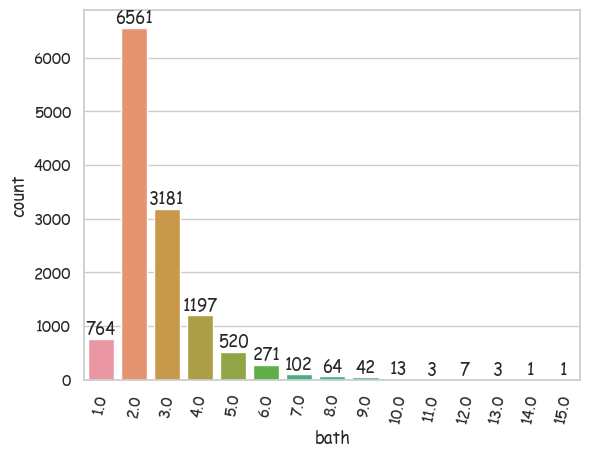

In [47]:
# count plot of column "bath"
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["bath"])
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.show()

### Majority of the houses has two bathrooms

## Handling Missing values

In [48]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5328
total_sqft         0
bath              57
balcony          586
price              0
dtype: int64

In [49]:
df['society'].isnull().sum()/len(df)*100 # Percent of missing values in the column 'society'

41.66731837021975

#### There are more than 40% missing values in the column 'society'.

#### Also the column 'availability' does not affect the price prediction.

#### There are 589 missing values in the column 'balcony'. But in certain locations having balcony might influence the price.  So we will keep the the column for now.

### Drop the columns 'availability', 'society'

In [50]:
df.drop(['availability','society'],axis=1,inplace=True)

In [51]:
df.isnull().sum()

area_type       0
location        1
size            0
total_sqft      0
bath           57
balcony       586
price           0
dtype: int64

In [52]:
# Delete the row where location is missing.
df.dropna(subset=['location'],inplace=True)

In [53]:
df.isnull().sum()

area_type       0
location        0
size            0
total_sqft      0
bath           57
balcony       586
price           0
dtype: int64

In [54]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00


## Outlier treatment

### For each location price per sqft area will not vary much. Introduce a new column price per sqft, which can be used to find outliers.

In [55]:
df['price_per_sqft']=df['price']*1000/df['total_sqft'] # Divide total price by total area

In [56]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,36.998106
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,46.153846
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,43.055556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,62.458909
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,42.500000


In [57]:
df.shape

(12786, 8)

### We will remove outliers based on column 'price per sqft'  for each location.

In [58]:
#Function to remove outliers based on IQR
def remove_outliers(group):
    Q1=group['price_per_sqft'].quantile(0.25)
    Q3=group['price_per_sqft'].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return group[(group['price_per_sqft']>=lower_bound) & (group['price_per_sqft']<=upper_bound)]
# Apply the function to each location separately
df=df.groupby('location').apply(remove_outliers).reset_index(drop=True)

In [59]:
df.shape

(11971, 8)

In [60]:
df.drop(['price_per_sqft'],axis=1,inplace=True) # drop the column price_per_sqft

### As noticed earlier, for some records, the number of 'baths' is more than number of rooms. Usually the number of bathrooms cannot be greater than two plus the number of rooms. We will remove records where the 'baths' is greater than two plus 'size'.

In [61]:
df=df[df['bath']<=df['size']+2]

In [62]:
df.shape

(11903, 7)

### Encoding categorical variables

In [61]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Built-up Area,Anekal,1,351.0,1.0,1.0,16.00
1,Super built-up Area,Banaswadi,1,527.0,1.0,0.0,35.00
2,Super built-up Area,Basavangudi,1,670.0,1.0,1.0,50.00
3,Super built-up Area,Bhoganhalli,1,296.0,1.0,0.0,22.89
4,Super built-up Area,Devarabeesana Halli,2,1100.0,2.0,1.0,70.00


### There are two categorical columns area_type and location.

In [63]:
df['location'].unique().shape # number of unique values in the column 'location'

(1300,)

### There are 1304 unique values in the column 'location'. The number should be reduced before applying encoding otherwise one hot encoding will result in high dimensionality and high sparsity.

In [64]:
df['location'].value_counts()

Whitefield                                            477
Sarjapur  Road                                        359
Electronic City                                       282
Kanakpura Road                                        227
Thanisandra                                           226
Yelahanka                                             190
Marathahalli                                          158
Raja Rajeshwari Nagar                                 154
Hebbal                                                154
Hennur Road                                           143
Uttarahalli                                           141
Bannerghatta Road                                     139
Electronic City Phase II                              126
7th Phase JP Nagar                                    126
Rajaji Nagar                                          102
Haralur Road                                           94
Bellandur                                              88
Electronics Ci

## Dimentionality Reduction 

### The locations with very few value counts may be unpopular locations and all these can be grouped together as 'other locations'. We will label locations with less than or equal to 10 value counts as  'other locations'.

In [65]:
location_value_counts=df['location'].value_counts()
other_locations=location_value_counts[location_value_counts<=10].index.tolist() # lcations with value counts less than or equal to 20

In [67]:
len(other_locations)

1076

In [66]:
df['location']=df['location'].apply(lambda x: 'other locations' if x in other_locations else x)

In [68]:
df['location'].value_counts()

other locations                2891
Whitefield                      477
Sarjapur  Road                  359
Electronic City                 282
Kanakpura Road                  227
Thanisandra                     226
Yelahanka                       190
Marathahalli                    158
Hebbal                          154
Raja Rajeshwari Nagar           154
Hennur Road                     143
Uttarahalli                     141
Bannerghatta Road               139
7th Phase JP Nagar              126
Electronic City Phase II        126
Rajaji Nagar                    102
Haralur Road                     94
Bellandur                        88
Electronics City Phase 1         85
Hoodi                            84
KR Puram                         79
Chandapura                       79
Harlur                           75
Yeshwanthpur                     75
Kasavanhalli                     74
Sarjapur                         71
Hormavu                          69
Hosa Road                   

In [69]:
df=pd.get_dummies(df,columns=['area_type','location'],prefix=['AT','Loca'])

In [69]:
df.head()

,size,total_sqft,bath,balcony,price,AT_Built-up Area,AT_Carpet Area,AT_Plot Area,AT_Super built-up Area,Loca_ Devarachikkanahalli,Loca_1st Block Jayanagar,Loca_1st Phase JP Nagar,Loca_2nd Stage Nagarbhavi,Loca_5th Block Hbr Layout,Loca_5th Phase JP Nagar,Loca_6th Phase JP Nagar,Loca_7th Phase JP Nagar,Loca_8th Phase JP Nagar,Loca_9th Phase JP Nagar,Loca_AECS Layout,Loca_Abbigere,Loca_Akshaya Nagar,Loca_Ambalipura,Loca_Ambedkar Nagar,Loca_Amruthahalli,Loca_Anandapura,Loca_Ananth Nagar,Loca_Anekal,Loca_Anjanapura,Loca_Ardendale,Loca_Arekere,Loca_Attibele,Loca_BTM 2nd Stage,Loca_BTM Layout,Loca_Babusapalaya,Loca_Balagere,Loca_Banashankari,Loca_Banashankari Stage II,Loca_Banashankari Stage III,Loca_Banashankari Stage V,Loca_Banashankari Stage VI,Loca_Banaswadi,Loca_Banjara Layout,Loca_Bannerghatta,Loca_Bannerghatta Road,Loca_Basavangudi,Loca_Basaveshwara Nagar,Loca_Battarahalli,Loca_Begur,Loca_Begur Road,Loca_Bellandur,Loca_Benson Town,Loca_Bharathi Nagar,Loca_Bhoganhalli,Loca_Billekahalli,Loca_Binny Pete,Loca_Bisuvanahalli,Loca_Bommanahalli,Loca_Bommasandra,Loca_Bommasandra Industrial Area,Loca_Brookefield,Loca_Budigere,Loca_CV Raman Nagar,Loca_Chamrajpet,Loca_Chandapura,Loca_Channasandra,Loca_Chikka Tirupathi,Loca_Chikkabanavar,Loca_Chikkalasandra,Loca_Choodasandra,Loca_Cooke Town,Loca_Cunningham Road,Loca_Dasanapura,Loca_Dasarahalli,Loca_Devanahalli,Loca_Dodda Nekkundi,Loca_Doddaballapur,Loca_Doddathoguru,Loca_Domlur,Loca_Dommasandra,Loca_EPIP Zone,Loca_Electronic City,Loca_Electronic City Phase II,Loca_Electronics City Phase 1,Loca_Frazer Town,Loca_GM Palaya,Loca_Garudachar Palya,Loca_Giri Nagar,Loca_Gollarapalya Hosahalli,Loca_Gottigere,Loca_Green Glen Layout,Loca_Gubbalala,Loca_Gunjur,Loca_HAL 2nd Stage,Loca_HBR Layout,Loca_HRBR Layout,Loca_HSR Layout,Loca_Haralur Road,Loca_Harlur,Loca_Hebbal,Loca_Hebbal Kempapura,Loca_Hegde Nagar,Loca_Hennur,Loca_Hennur Road,Loca_Hoodi,Loca_Horamavu Agara,Loca_Horamavu Banaswadi,Loca_Hormavu,Loca_Hosa Road,Loca_Hosakerehalli,Loca_Hoskote,Loca_Hosur Road,Loca_Hulimavu,Loca_ISRO Layout,Loca_ITPL,Loca_Iblur Village,Loca_Indira Nagar,Loca_JP Nagar,Loca_Jakkur,Loca_Jalahalli,Loca_Jalahalli East,Loca_Jigani,Loca_Judicial Layout,Loca_KR Puram,Loca_Kadubeesanahalli,Loca_Kadugodi,Loca_Kaggadasapura,Loca_Kaggalipura,Loca_Kaikondrahalli,Loca_Kalena Agrahara,Loca_Kalyan nagar,Loca_Kambipura,Loca_Kammanahalli,Loca_Kammasandra,Loca_Kanakapura,Loca_Kanakpura Road,Loca_Kannamangala,Loca_Karuna Nagar,Loca_Kasavanhalli,Loca_Kasturi Nagar,Loca_Kathriguppe,Loca_Kaval Byrasandra,Loca_Kenchenahalli,Loca_Kengeri,Loca_Kengeri Satellite Town,Loca_Kereguddadahalli,Loca_Kodichikkanahalli,Loca_Kodigehalli,Loca_Kodihalli,Loca_Kogilu,Loca_Konanakunte,Loca_Koramangala,Loca_Kothannur,Loca_Kothanur,Loca_Kudlu,Loca_Kudlu Gate,Loca_Kumaraswami Layout,Loca_Kundalahalli,Loca_Laggere,Loca_Lakshminarayana Pura,Loca_Lingadheeranahalli,Loca_Magadi Road,Loca_Mahadevpura,Loca_Mahalakshmi Layout,Loca_Mallasandra,Loca_Malleshpalya,Loca_Malleshwaram,Loca_Marathahalli,Loca_Margondanahalli,Loca_Munnekollal,Loca_Murugeshpalya,Loca_Mysore Road,Loca_NGR Layout,Loca_NRI Layout,Loca_Nagarbhavi,Loca_Nagavara,Loca_Nagavarapalya,Loca_Neeladri Nagar,Loca_OMBR Layout,Loca_Old Airport Road,Loca_Old Madras Road,Loca_Padmanabhanagar,Loca_Pai Layout,Loca_Panathur,Loca_Pattandur Agrahara,Loca_Poorna Pragna Layout,Loca_Prithvi Layout,Loca_R.T. Nagar,Loca_Rachenahalli,Loca_Raja Rajeshwari Nagar,Loca_Rajaji Nagar,Loca_Rajiv Nagar,Loca_Ramagondanahalli,Loca_Ramamurthy Nagar,Loca_Rayasandra,Loca_Sahakara Nagar,Loca_Sanjay nagar,Loca_Sarakki Nagar,Loca_Sarjapur,Loca_Sarjapur Road,Loca_Sarjapura - Attibele Road,Loca_Sector 2 HSR Layout,Loca_Sector 7 HSR Layout,Loca_Seegehalli,Loca_Shampura,Loca_Shivaji Nagar,Loca_Singasandra,Loca_Somasundara Palya,Loca_Sompura,Loca_Sonnenahalli,Loca_Subramanyapura,Loca_Sultan Palaya,Loca_TC Palaya,Loca_Talaghattapura,Loca_Thanisandra,Loca_Thigalarapalya,Loca_Thubarahalli,Loca_Thyagaraja Nagar,Loca_Tumkur Road,Loca_Ulsoor,Loca

In [70]:
df.isnull().sum()

size                                  0
total_sqft                            0
bath                                  0
balcony                             438
price                                 0
AT_Built-up  Area                     0
AT_Carpet  Area                       0
AT_Plot  Area                         0
AT_Super built-up  Area               0
Loca_ Devarachikkanahalli             0
Loca_1st Block Jayanagar              0
Loca_1st Phase JP Nagar               0
Loca_2nd Stage Nagarbhavi             0
Loca_5th Block Hbr Layout             0
Loca_5th Phase JP Nagar               0
Loca_6th Phase JP Nagar               0
Loca_7th Phase JP Nagar               0
Loca_8th Phase JP Nagar               0
Loca_9th Phase JP Nagar               0
Loca_AECS Layout                      0
Loca_Abbigere                         0
Loca_Akshaya Nagar                    0
Loca_Ambalipura                       0
Loca_Ambedkar Nagar                   0
Loca_Amruthahalli                     0


### The number of balconies might influence the price of houses in particular regions. We will use KNN imputation for fill the missing values.

In [71]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [72]:
df_imputed.isnull().sum()

size                                0
total_sqft                          0
bath                                0
balcony                             0
price                               0
AT_Built-up  Area                   0
AT_Carpet  Area                     0
AT_Plot  Area                       0
AT_Super built-up  Area             0
Loca_ Devarachikkanahalli           0
Loca_1st Block Jayanagar            0
Loca_1st Phase JP Nagar             0
Loca_2nd Stage Nagarbhavi           0
Loca_5th Block Hbr Layout           0
Loca_5th Phase JP Nagar             0
Loca_6th Phase JP Nagar             0
Loca_7th Phase JP Nagar             0
Loca_8th Phase JP Nagar             0
Loca_9th Phase JP Nagar             0
Loca_AECS Layout                    0
Loca_Abbigere                       0
Loca_Akshaya Nagar                  0
Loca_Ambalipura                     0
Loca_Ambedkar Nagar                 0
Loca_Amruthahalli                   0
Loca_Anandapura                     0
Loca_Ananth 

### Separating the dependent variable (Target) and independent variables (Features)

In [73]:
X=df_imputed.drop(['price'],axis=1)
Y=df_imputed['price']

### Scaling the data
Since there are certain columns with very small values and some columns with high values, we will scale the columns.

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

### Train-test split

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2, random_state=100)

## Importing regression  models  and evaluation metrics

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [78]:
# Define the regression models
models={'Linear Regression':LinearRegression(),
        'Ridge Regression':Ridge(),
        'Lasso Regression':Lasso(),
        'Decision Tree':DecisionTreeRegressor(),
        'Random Forest':RandomForestRegressor(),
        'Gradient Boosting':GradientBoostingRegressor()
}
# Loop through each model
for name,model in models.items():
    model.fit(X_train,Y_train)
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)
    rmse_train=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    rmse_test=np.sqrt(mean_squared_error(Y_test,Y_test_pred))
    r2_train=r2_score(Y_train,Y_train_pred)
    r2_test=r2_score(Y_test,Y_test_pred)
    print(f'Model:{name}')
    print(f'RMSE_train:{rmse_train}')
    print(f'RMSE_test:{rmse_test}')
    print(f'r2_score_train:{r2_train}')
    print(f'r2_score_test:{r2_test}')
    print('*'*100)
        

Model:Linear Regression
RMSE_train:103.46307346043054
RMSE_test:95.32613572993105
r2_score_train:0.34025027027980426
r2_score_test:0.3360488013077738
****************************************************************************************************
Model:Ridge Regression
RMSE_train:103.46074716184093
RMSE_test:95.34011225942216
r2_score_train:0.3402799380165187
r2_score_test:0.33585409261164967
****************************************************************************************************
Model:Lasso Regression
RMSE_train:104.11732481268172
RMSE_test:95.6439541668681
r2_score_train:0.3318800008039481
r2_score_test:0.3316141791481899
****************************************************************************************************
Model:Decision Tree
RMSE_train:10.257648829894233
RMSE_test:95.92065768921614
r2_score_train:0.9935150874471762
r2_score_test:0.32774122679206164
****************************************************************************************************
Mode

### Random Forest regressor is giving highest test r2 score. r2 score for train is about 0.93 and for test is only 0.65. So, there is overfitting.

### Cross validation to find the best model

In [79]:
from sklearn.model_selection import cross_val_score
for name,model in models.items():
    scores=cross_val_score(model,X_train,Y_train,cv=5,scoring='r2')
    mean_r2_score=scores.mean()
    print(f'{name}:Mean r2 score={mean_r2_score:.4f}')

Linear Regression:Mean r2 score=0.1256
Ridge Regression:Mean r2 score=0.1270
Lasso Regression:Mean r2 score=0.2197
Decision Tree:Mean r2 score=0.3572
Random Forest:Mean r2 score=0.6033
Gradient Boosting:Mean r2 score=0.6107


## Random Forest and Gradient Boosting are giving the best mean r2 scores

## Hyperparameter tuning

#### We will apply hyperparameter tuning for GradientBoostingRegressor.

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameters to tune for GradientBoostingRegressor
gb_param_dist={
    'n_estimators':randint(50,200),
    'learning_rate':[0.001,0.01,0.1,0.2,0.3],
    'max_depth':randint(3,10),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
}

# Instantiate the models
gb_regressor = GradientBoostingRegressor()

# Perform grid search with cross-validation for GradientBoostingRegressor
gb_random_search = RandomizedSearchCV(estimator=gb_regressor, param_distributions=gb_param_dist, cv=5, scoring='r2',n_jobs=-1)
gb_random_search.fit(X_train, Y_train)

# Get the best hyperparameters for GradientBoostingRegressor
best_gb_params = gb_random_search.best_params_


# Fit models with best parameters on the entire training data
best_gb_regressor = GradientBoostingRegressor(**best_gb_params)
best_gb_regressor.fit(X_train, Y_train)

# Evaluate models on the test set
gb_r2 = r2_score(Y_test, best_gb_regressor.predict(X_test))
print("GradientBoostingRegressor r2_score:", gb_r2)

GradientBoostingRegressor r2_score: 0.6925427946469398


In [86]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters to tune for GradientBoostingRegressor
gb_param_grid={
    'n_estimators':[50,100,150,200],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5,6,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

# Instantiate the models
gb_regressor = GradientBoostingRegressor()

# Perform grid search with cross-validation for GradientBoostingRegressor
gb_grid_search = GridSearchCV(estimator=gb_regressor, param_grid=gb_param_grid, cv=5, scoring='r2',n_jobs=-1)
gb_grid_search.fit(X_train, Y_train)

# Get the best hyperparameters for GradientBoostingRegressor
best_gb_params = gb_grid_search.best_params_


# Fit models with best parameters on the entire training data
best_gb_regressor = GradientBoostingRegressor(**best_gb_params)
best_gb_regressor.fit(X_train, Y_train)

# Evaluate models on the test set
gb_r2 = r2_score(Y_test, best_gb_regressor.predict(X_test))
print("GradientBoostingRegressor r2_score:", gb_r2)

GradientBoostingRegressor r2_score: 0.6992225606815805


#### We will apply hyperparameter tuning for Random Forest Regressor.

In [88]:


# Define hyperparameters to tune for RandomForestRegressor
rf_param_grid={
    'n_estimators':[50,100,150,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

# Instantiate the model
rf_regressor = RandomForestRegressor()

# Perform grid search with cross-validation for RandomForestRegressor
rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=rf_param_grid, cv=5, scoring='r2',n_jobs=-1)
rf_grid_search.fit(X_train, Y_train)


# Get the best hyperparameters for RandomForestRegressor
best_rf_params = rf_grid_search.best_params_

# Fit models with best parameters on the entire training data
best_rf_regressor = RandomForestRegressor(**best_rf_params)
best_rf_regressor.fit(X_train, Y_train)

# Evaluate models on the test set
rf_r2 = r2_score(Y_test, best_rf_regressor.predict(X_test))

print("RandomForestRegressor r2_score:", rf_r2)

RandomForestRegressor r2_score: 0.7523708638479893


In [89]:
r2_score(Y_train, best_rf_regressor.predict(X_train))

0.8661515222301901

### Saving the model

In [ ]:
from joblib import dump
from joblib import load
dump(best_rf_regressor,'best_rf_regressor.joblib') # Save the trained model to a file
price_predictor=load('best_rf_regressor.joblib')   